# **AMAZON Data Analysis Project**

In [4]:
#Import required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df= pd.read_csv("/content/Amazon Sales data.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [12]:
#check NUll values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB




```
# This is formatted as code
```

#**Sales Trend**

In [25]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Extract month and year from 'Order Date'
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

# Create a 'Year-Month' column for combined yearly and monthly analysis
df['Year-Month'] = df['Order Date'].dt.to_period('M')


df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year-Month,YearMonth
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02,2013-02


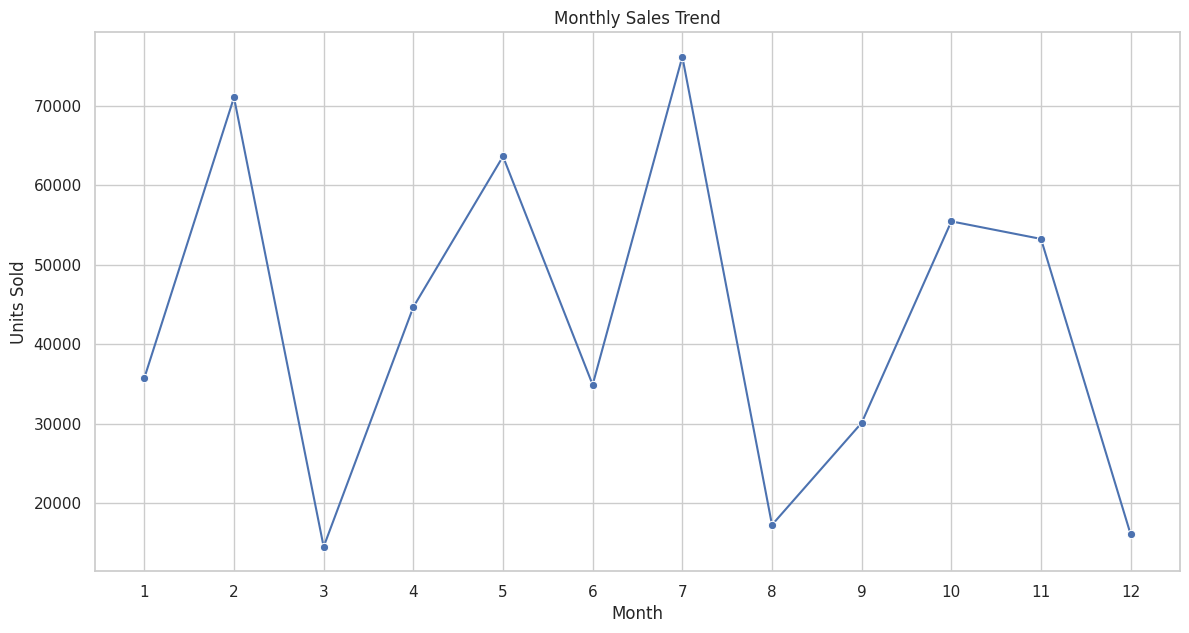

In [16]:

# Set plot style
sns.set(style="whitegrid")

# Aggregate data by month
monthly_sales = df.groupby('Order Month').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Plot monthly sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Order Month', y='Units Sold', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(monthly_sales['Order Month'])
plt.grid(True)
plt.show()

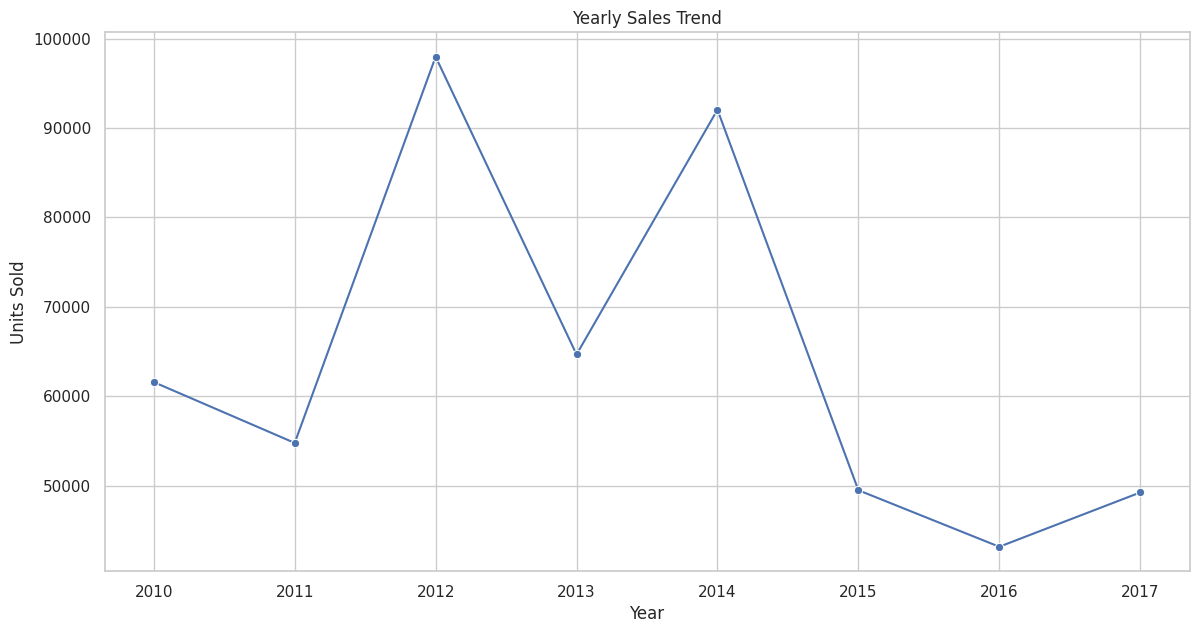

In [19]:
# Plot Yearly sales trend

# Aggregate data by month
yearly_sales = df.groupby('Order Year').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_sales, x='Order Year', y='Units Sold', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.xticks(yearly_sales['Order Year'])
plt.grid(True)
plt.show()

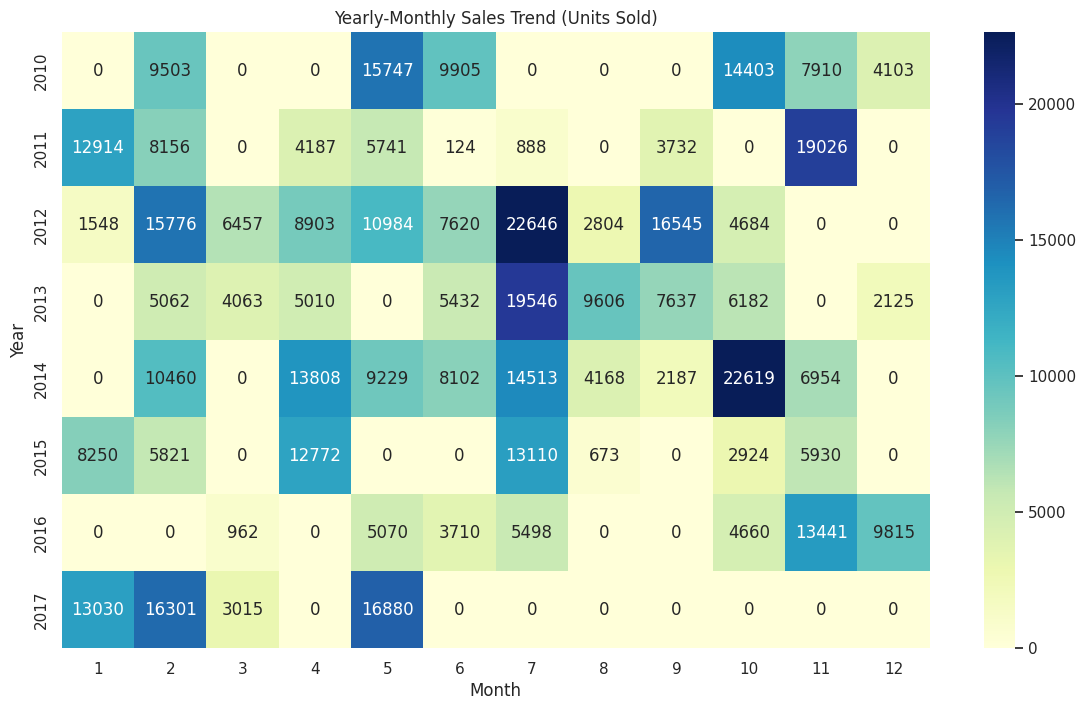

In [28]:
#Yearly_Month Wise Trend

heatmap_data = df.pivot_table(index='Order Year', columns='Order Month', values='Units Sold', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Yearly-Monthly Sales Trend (Units Sold)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

#**Key Matrics**

In [29]:
#average order value

average_order_value = df['Total Revenue'].mean()
print(f"Average Order Value: ${average_order_value:.2f}")



Average Order Value: $1373487.68


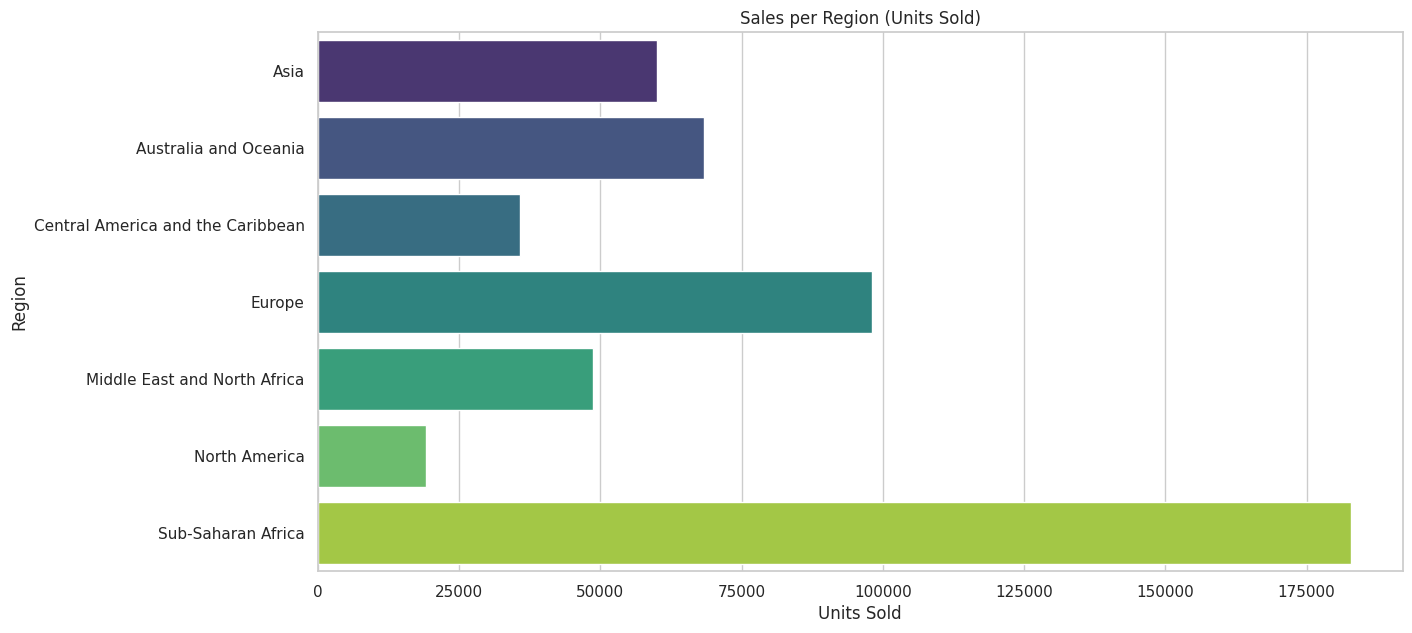

In [43]:
#sales per region

# Aggregate data by region
region_sales = df.groupby('Region').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Plot sales per region
plt.figure(figsize=(14, 7))
sns.barplot(data=region_sales, x='Units Sold', y='Region', hue='Region', palette='viridis')
plt.title('Sales per Region (Units Sold)')
plt.xlabel('Units Sold')
plt.ylabel('Region')
plt.show()

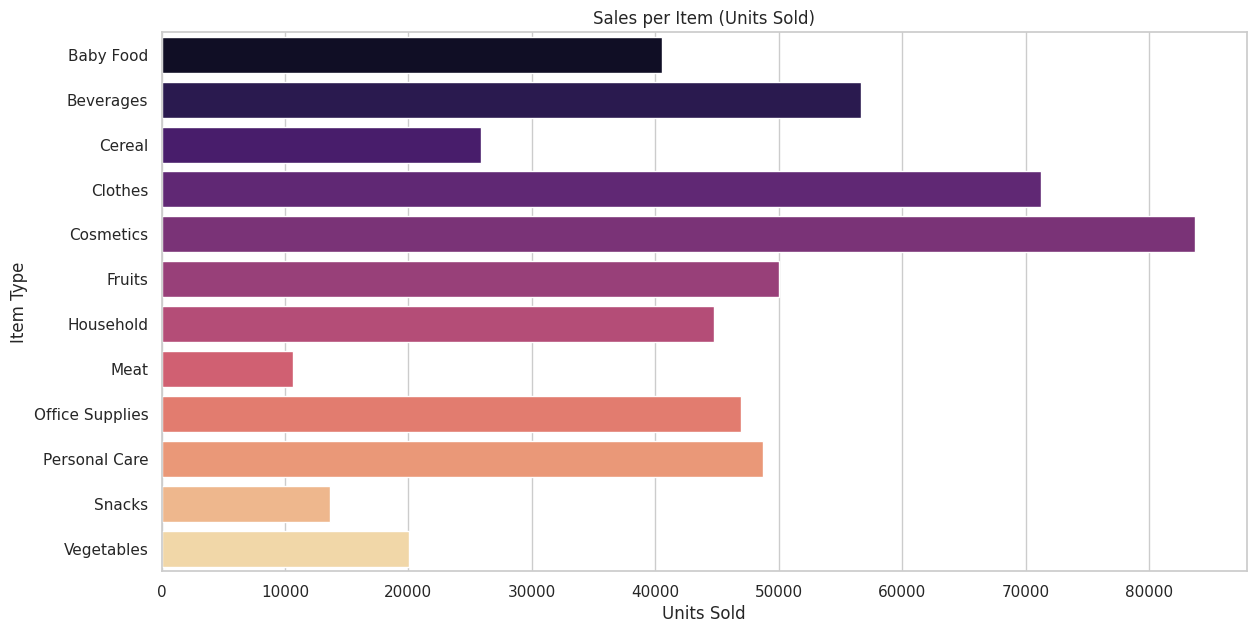

In [44]:
#sales per item type

# Aggregate data by item type
item_type_sales = df.groupby('Item Type').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

#Plot Sales per item type

plt.figure(figsize=(14, 7))
sns.barplot(data=item_type_sales, x='Units Sold', y='Item Type', hue='Item Type', palette='magma')
plt.title('Sales per Item (Units Sold)')
plt.xlabel('Units Sold')
plt.ylabel('Item Type')
plt.show()


# **Meaningful Relationship**

#Correlation Matrix

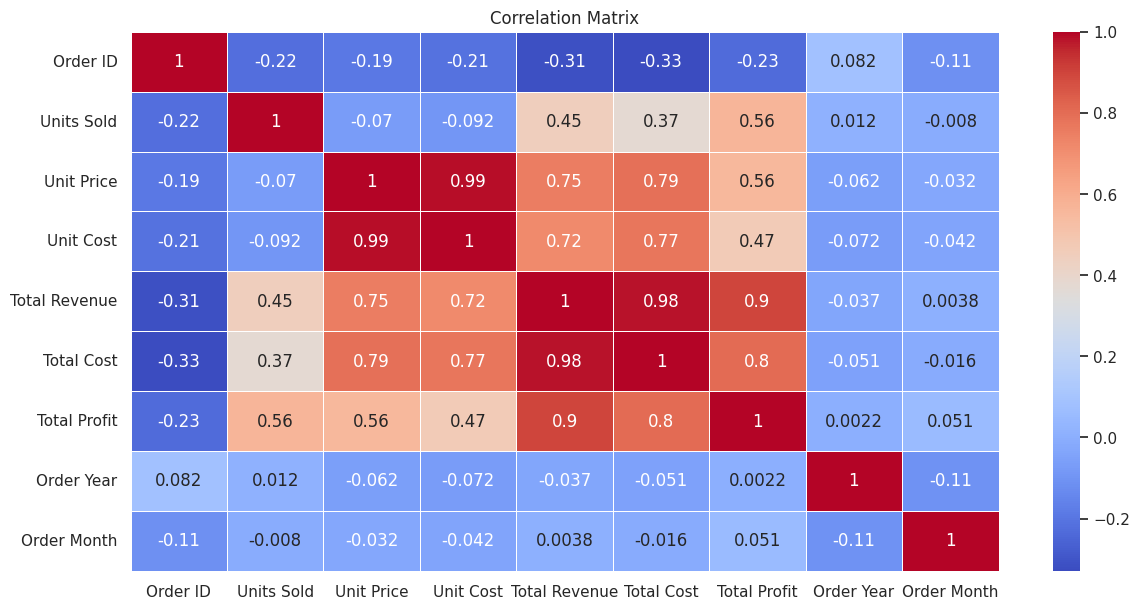

In [47]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Pair Plot

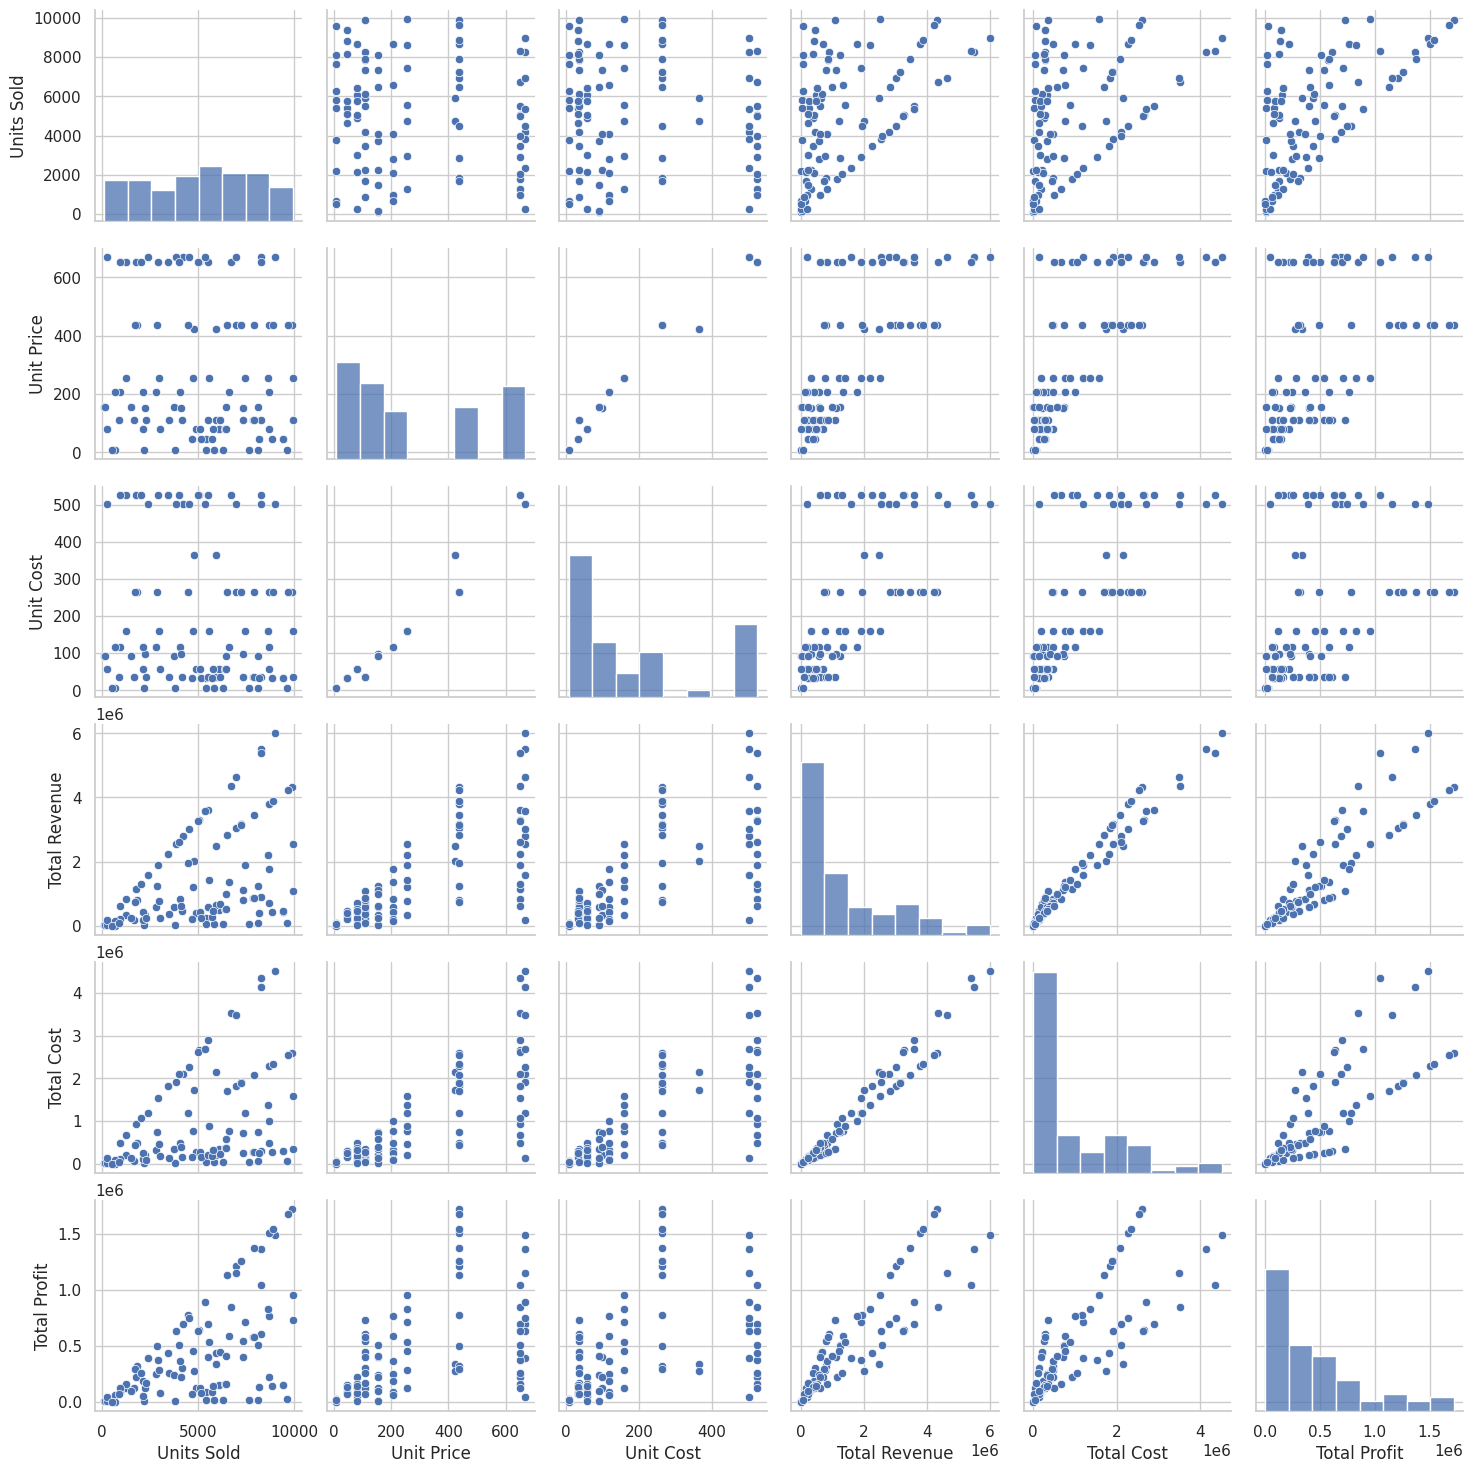

In [48]:
# Select numerical columns for the pair plot
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Create the pair plot
sns.pairplot(df[numerical_columns])
plt.show()